## Visuals

I'll try to keep things a bit cleaner and designate this notebook to play around.

Note to assume everything is about the training data unless otherwise noted.

Furthermore, the cedas are meant for explanations; here I'll just be focusing on visuals (albeit including titles and the like).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../data/train.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
print(df.shape)
df.head()

(76518, 38)


,id,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


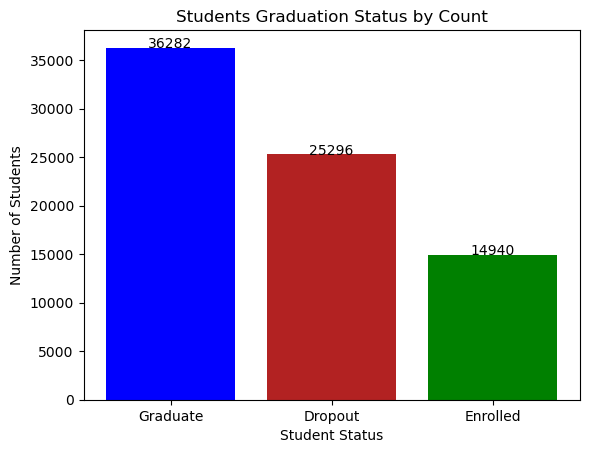

In [4]:
x = df['target'].unique()
height = df['target'].value_counts()
colors = ['blue', 'firebrick', 'green']

plot_title = 'Students Graduation Status by Count'
xlab = 'Student Status' 
ylab = 'Number of Students'

plt.bar(x, height, color=colors)

#Sigh, I was hoping there'd be a cleaner way than this. Thanks ChatGPT for finding it.
for i in range(len(x)):
    plt.text(x[i], height[i] + 0.1, str(height[i]), ha='center')

plt.title(plot_title)
plt.xlabel(xlab)
plt.ylabel(ylab);
#Yeah that red... hence a more toned down 'firebrick' instead
# #https://matplotlib.org/stable/gallery/color/named_colors.html

#Hmm, bother to put a legend? Eh, when we already have the categories below...

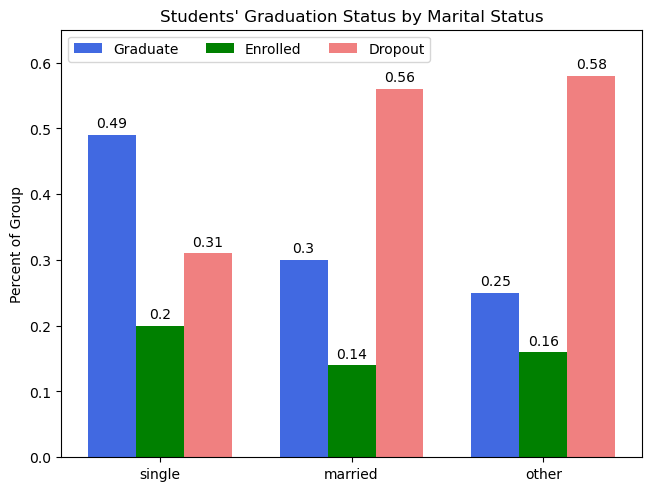

In [5]:
#Hmm, let's do a marital status look next (this coder is quite interested for various personal reasonns)

df['marital_2'] = [3 if i != 1 and i != 2  else i for i in df['marital_status']]
# print(df['marital_2'].value_counts(normalize=True))

#Thanks to Jezarel from Stackoverflow (glad to finally be back there)
df2 = df.groupby(['marital_2', 'target']).size().reset_index(name='group_count')
a = df2.groupby('marital_2')['group_count'].transform('sum')
df2['group_count'] = df2['group_count'].div(a)
# print(df2['group_count'])

#Based upon Matpyplot's example [and thanks to ChatGPT...re. the help on the colors to cycle through them]

status = ('single', 'married', 'other')
status_target_percentages = {
    'Graduate': (round(df2['group_count'].iloc[2::3], 2)),
    'Enrolled': (round(df2['group_count'].iloc[1::3], 2)),
    'Dropout': (round(df2['group_count'].iloc[::3], 2)),
}
colors = ['royalblue', 'green', 'lightcoral']
x = np.arange(len(status))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in status_target_percentages.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

plot_title = "Students' Graduation Status by Marital Status"
ylab = 'Percent of Group'

ax.set_ylabel(ylab)
ax.set_title(plot_title)
ax.set_xticks(x + width, status)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, .65);

If I'm going to be too lazy to make any more today,let's at least plan out others to do: Get this done and start pounding
connections or whatever...

daytime/evening x graduate/dropout ; eh, already did onne split... Ideaelly choose something else besides brs<br>
age (likely related to the single.... see correlation)<br>
unemployment rate? or maybe inflation<br>
    from a visual inflationn is better, but for the presentation; noob do inflation and just comment such
    similarily, gdp...
<br>
<br>
And, obviously, a final confusion matrix

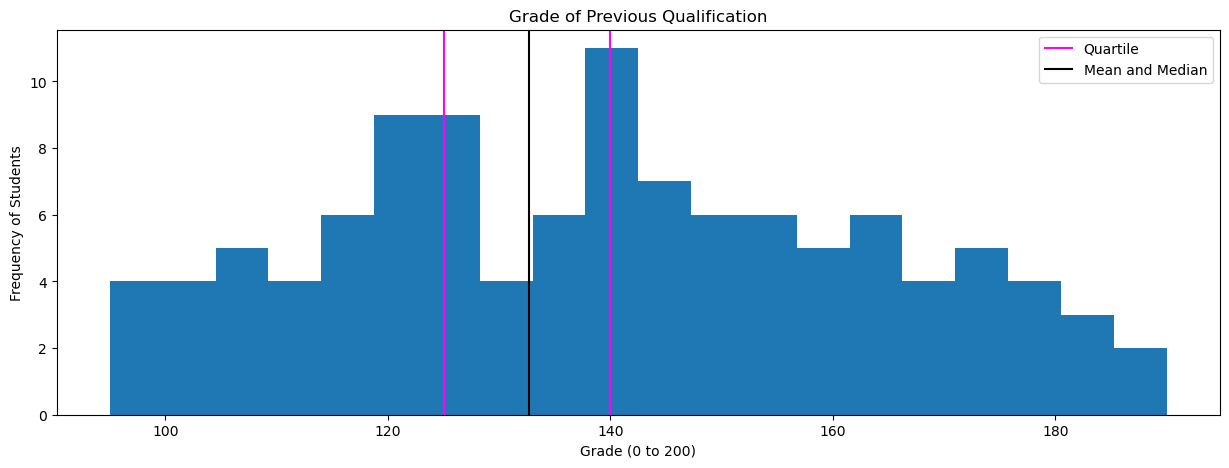

In [6]:
#Eh, could potentially add axvlines for min, max
#Also could add text to the lines; maybe add some more tickers, but eh...

x = df['previous_qualification_(grade)'].unique()
bin_no = 20

plot_title = 'Grade of Previous Qualification'
xlab = 'Grade (0 to 200)' 
ylab = 'Frequency of Students'

plt.figure(figsize = (15, 5))
plt.hist(x, bin_no)

plt.axvline(x=125, color = 'magenta', label='Quartile')
plt.axvline(x=132.7, color = 'black', label='Mean and Median') #Approx. the same, so to make matters cleaner...
plt.axvline(x=140, color = 'magenta')
plt.legend()

plt.title(plot_title)
plt.xlabel(xlab)
plt.ylabel(ylab);

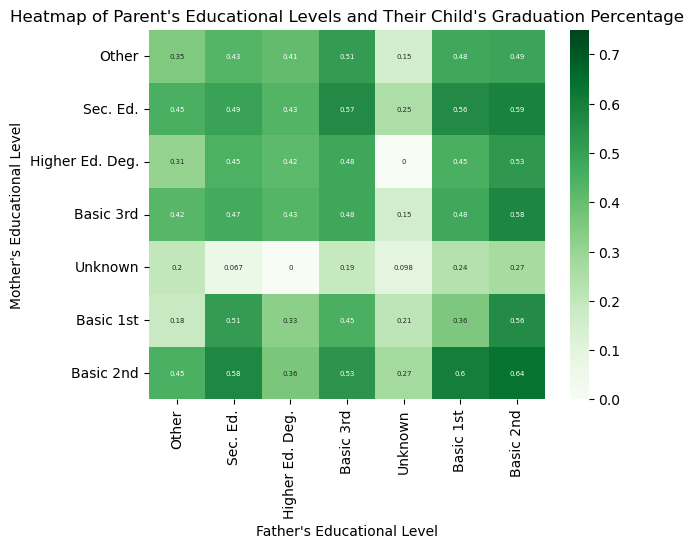

In [7]:
#Let's do education next:

mostcommon = [37,19,1,38,3,34] #Somewhat arbitrarily chosen, but before the 6th qualification the total remaining percentage
#is less than any subsequent group. So, to simplify matters...
df['fq2_2'] = [0 if i not in mostcommon  else i for i in df['father\'s_qualification']]
df['mq2_2'] = [0 if i not in mostcommon  else i for i in df['mother\'s_qualification']]

#From 0 to 38
education_interpretation = ['Other', 'Sec. Ed.', 'Higher Ed. Deg.', 'Basic 3rd', 'Unknown', 'Basic 1st', 'Basic 2nd']

#All right, let's get the percentage of graduates per 'household education type' now:
parential_education_df = pd.DataFrame()
for i in sorted(df['fq2_2'].unique()):
    parential_education_df[education_interpretation[sorted(df['mq2_2'].unique()).index(i)]] = [0,0,0,0,0,0,0] #eh, works for now
    for j in sorted(df['mq2_2'].unique()):
        try:
            parential_education_df[education_interpretation[sorted(df['mq2_2'].unique()).index(i)]].loc[sorted(df['mq2_2'].unique()).index(j)] = df[(df['fq2_2']==i)&(df['mq2_2']==j)]['target'].value_counts(normalize=True)['Graduate']
        except:
            pass #Might as well as by default we're adding zeos
parential_education_df["Mother's Educational Level"] = education_interpretation
parential_education_df.set_index("Mother's Educational Level", inplace=True) #Might as well rely on that for the yaxis label

plot_title = "Heatmap of Parent's Educational Levels and Their Child's Graduation Percentage"
xlab = "Father's Educational Level"

sns.heatmap(parential_education_df, annot=True, vmin = 0, vmax = .75, cmap='Greens', annot_kws={'fontsize':5})
plt.title(plot_title)
plt.xlabel(xlab);

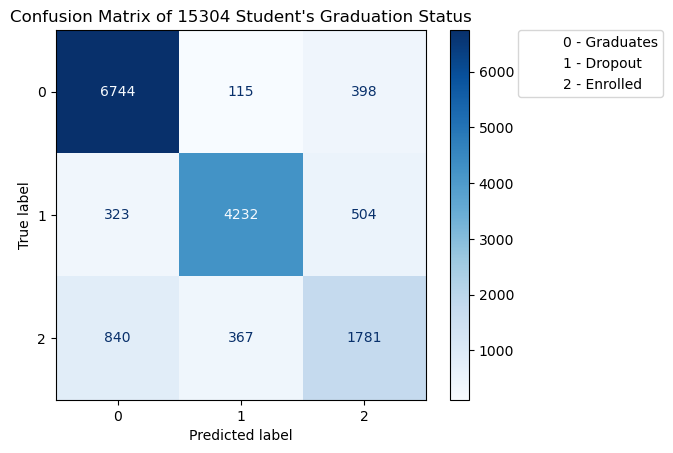

In [12]:
#Now for our final model's confusion matrix:

with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

plot_title = f"Confusion Matrix of {y_test.shape[0]} Student's Graduation Status"

ConfusionMatrixDisplay.from_estimator(model,X_test,y_test, cmap='Blues')
legend_labels = ['0 - Graduates', '1 - Dropout', '2 - Enrolled']
legend_elements = [Line2D([0], [0], color='black', lw=0, label=legend_labels[i]) for i in range(len(legend_labels))] #Gah, ChatGPT is such a helpful tool!
plt.legend(handles=legend_elements, bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.)
plt.title(plot_title);

## Concluding Remarks

At least for the sake of being aggressive about building rapport with people and the like via LinkedIn, as unfortunately it doesn't seem a valid form of 'effort' to apply banally (at least given my circumstances).

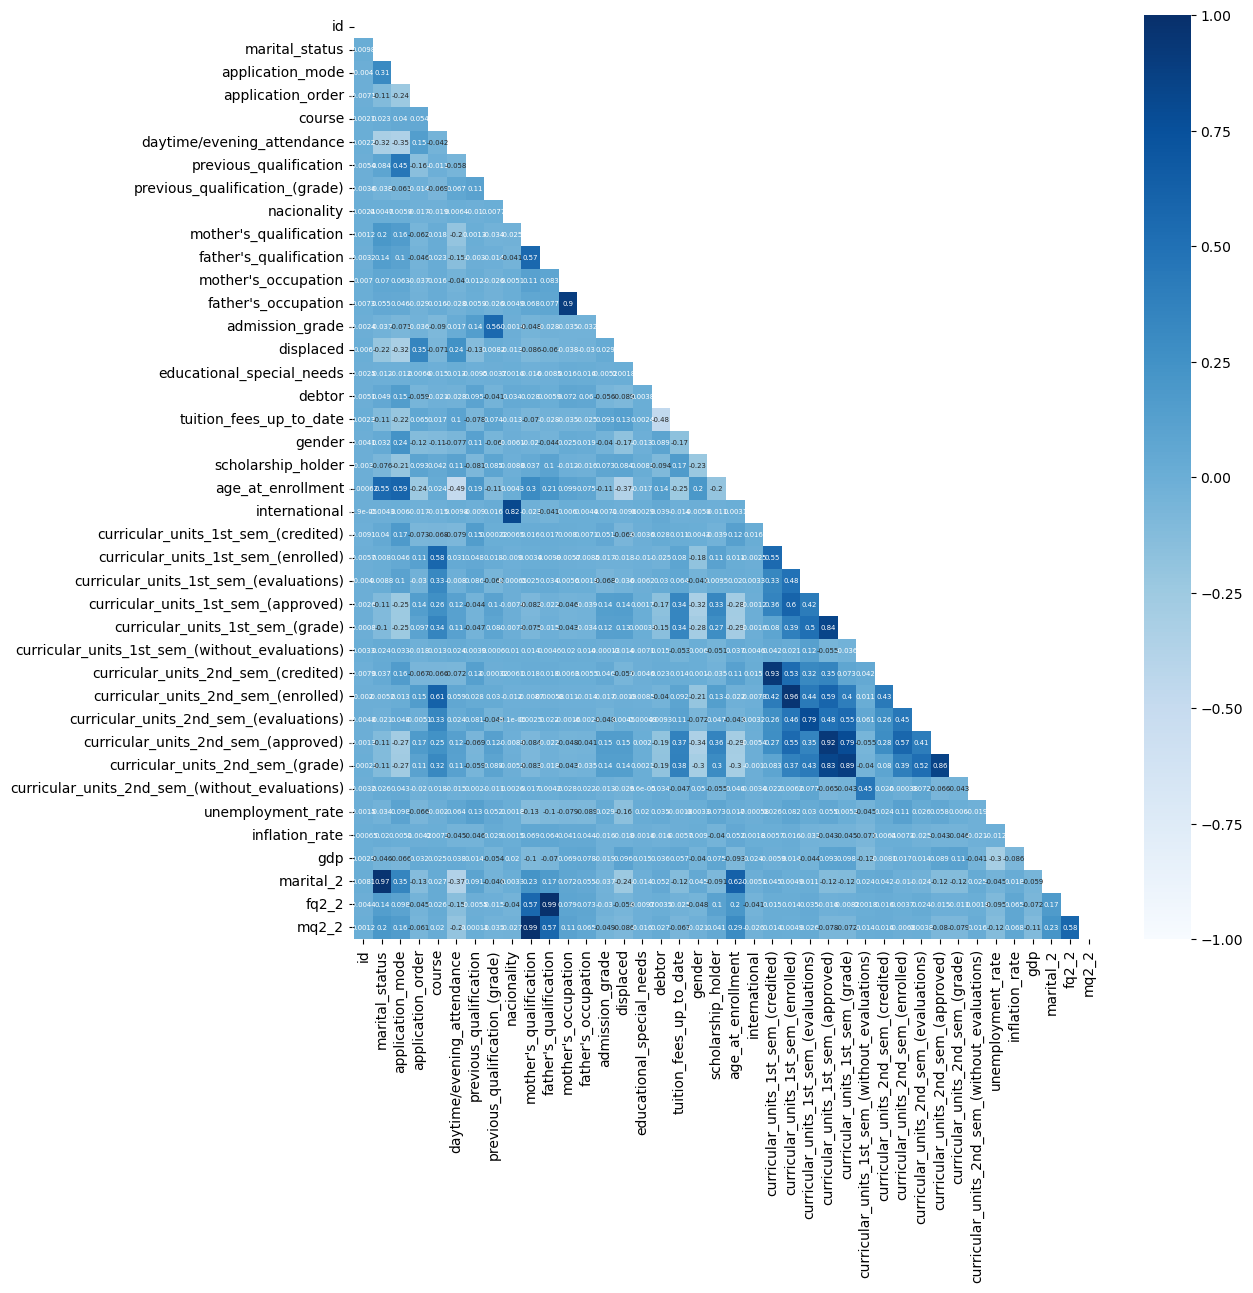

In [9]:
#Bringing over the old heatmap for all of the variables.

plt.figure(figsize=(12, 12))
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True, vmin = -1, vmax = 1, cmap='Blues', annot_kws={'fontsize':5});